# Introduction

## Wisconsin Breast Cancer Dataset
The Wisconsin Breast Cancer Dataset is a widely used dataset in machine learning, particularly in the field of medical diagnosis. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features describe characteristics of the cell nuclei present in the image, such as texture, radius, perimeter, area, and smoothness.

## Unsupervised Learning
Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. In this report, we will use unsupervised learning techniques to cluster the Wisconsin Breast Cancer Dataset, aiming to find meaningful patterns and insights.

## Structure of the Report
This report is structured as follows:

1. **Data Preprocessing**: We will scale the features of the dataset and prepare it for unsupervised learning 

2. **Exploratory Data Analysis (EDA)**: Before applying machine learning models, we will conduct an exploratory data analysis to understand the dataset's characteristics, including the distribution and scale of geatures.algorithms.

2. **Unsupervised Learning Models**: We will apply three different unsupervised learning models to cluster the data.

3. **Model Evaluation**: We will use the original labels of the dataset to evaluate the accuraty of each clustering model.

4. **Ensembling Models**: An attempt will be made to combine the three models in an ensemble approach to see if it yields better results.

5. **Conclusion**: We will summarize our findings and discuss insights gained from the analysis of the dataset using these unsupervised methods.

# Data Preprocessing

In this section, we will prepare the Wisconsin Breast Cancer dataset for unsupervised learning. The preprocessing steps include:

1. **Importing Libraries**: We begin by importing necessary Python libraries. These include:
   - `numpy` and `pandas` for data manipulation.
   - `matplotlib.pyplot` and `seaborn` for data visualization.
   - Various functions and classes from `sklearn` for data preprocessing, dimensionality reduction, clustering, and evaluating cluster quality.
   - `scipy` functions for hierarchical clustering and statistical analysis.

2. **Loading the Dataset**: The dataset is loaded using `sklearn.datasets.load_breast_cancer`. It comprises features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei.

3. **Data Preparation**:
   - A DataFrame `df_train` is created for clustering. This dataframe consists of the features of the dataset.
   - Another DataFrame `df_results` is prepared to store the original target labels. This will be useful for evaluating the performance of our unsupervised models later.

These steps are crucial for setting up the dataset for the subsequent unsupervised learning models.


In [1]:
# Importing necessary libraries
# Basic data handling and array manipulation
import numpy as np
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

# Cluster evaluation metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Hierarchical clustering visualization
from scipy.cluster.hierarchy import dendrogram, linkage

# Statistical analysis
from scipy.stats import chi2_contingency

# Performance metrics for supervised learning (for reference)
from sklearn.metrics import precision_score, recall_score, f1_score

# Supress deprication warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names
target = breast_cancer.target

# Create a DataFrame for training (clustering) - df_train
# This DataFrame contains the features of the dataset
df_train = pd.DataFrame(data, columns=features)

# Create a DataFrame for results - df_results
# This DataFrame will store the original target labels, which can be used for evaluation
df_results = pd.DataFrame(target, columns=['target'])


# Exploratory Data Analysis (EDA)

## Basic Descriptive Statistics
We begin our EDA by examining the basic descriptive statistics of the dataset. This step is crucial to understand the distribution and scale of our features. The `.describe()` method on our `df_train` DataFrame provides a summary that includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each feature.

### Observations from the Descriptive Statistics:
- The dataset consists of 569 samples (count) with 30 features.
- There is considerable variation in the scale and distribution of the features. For example:
  - The `mean radius` varies from about 7 to 28 units.
  - The `mean area` ranges from approximately 143 to 2501 units.
- Such differences in scale can significantly impact clustering algorithms, as they often rely on the distance between data points.

## Importance of Feature Scaling
Given the varying scales of the features, it is essential to apply feature scaling to standardize the data. This ensures that each feature contributes equally to the distance calculations in clustering algorithms. Without scaling, features with larger magnitudes could disproportionately influence the results.

In the subsequent steps, we will use `StandardScaler` from `sklearn.preprocessing` to scale our features. This will transform the data such that each feature will have a mean of 0 and a standard deviation of 1, making them compatible in scale.

In [2]:
# Basic descriptive statistics
df_train.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

# Exploratory Data Analysis (EDA) - Visualizations

## Distribution of Target Variable
The first visualization in our EDA is the distribution of the target variable from `df_results`. We use a count plot to show the frequency of each class in the dataset, which are:
- `0` for benign tumors
- `1` for malignant tumors

This helps us understand the balance of classes within our data and may inform how we interpret the results of our clustering algorithms.

## Correlation Matrix of Features
Next, we explore the relationships between different features in `df_train` using a correlation heatmap. The correlation matrix visualized as a heatmap provides insight into:
- The strength and direction of the linear relationships between pairs of features.
- Potential multicollinearity, where two or more variables are highly correlated and can carry redundant information.
- This can influence our choice of features to include in the models or highlight the need for dimensionality reduction techniques like PCA.

By conducting this analysis, we ensure that we understand the underlying structure and relationships within our data before applying unsupervised learning algorithms.


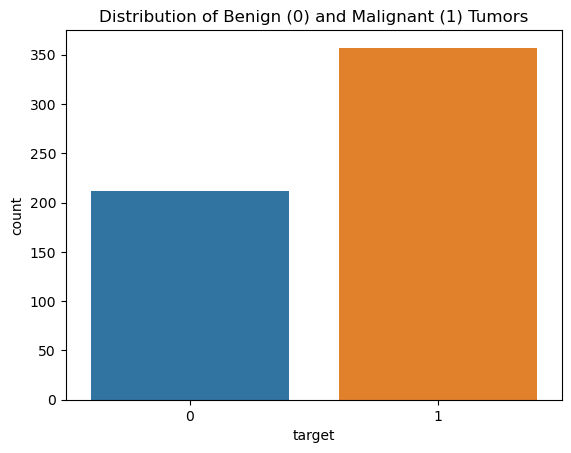

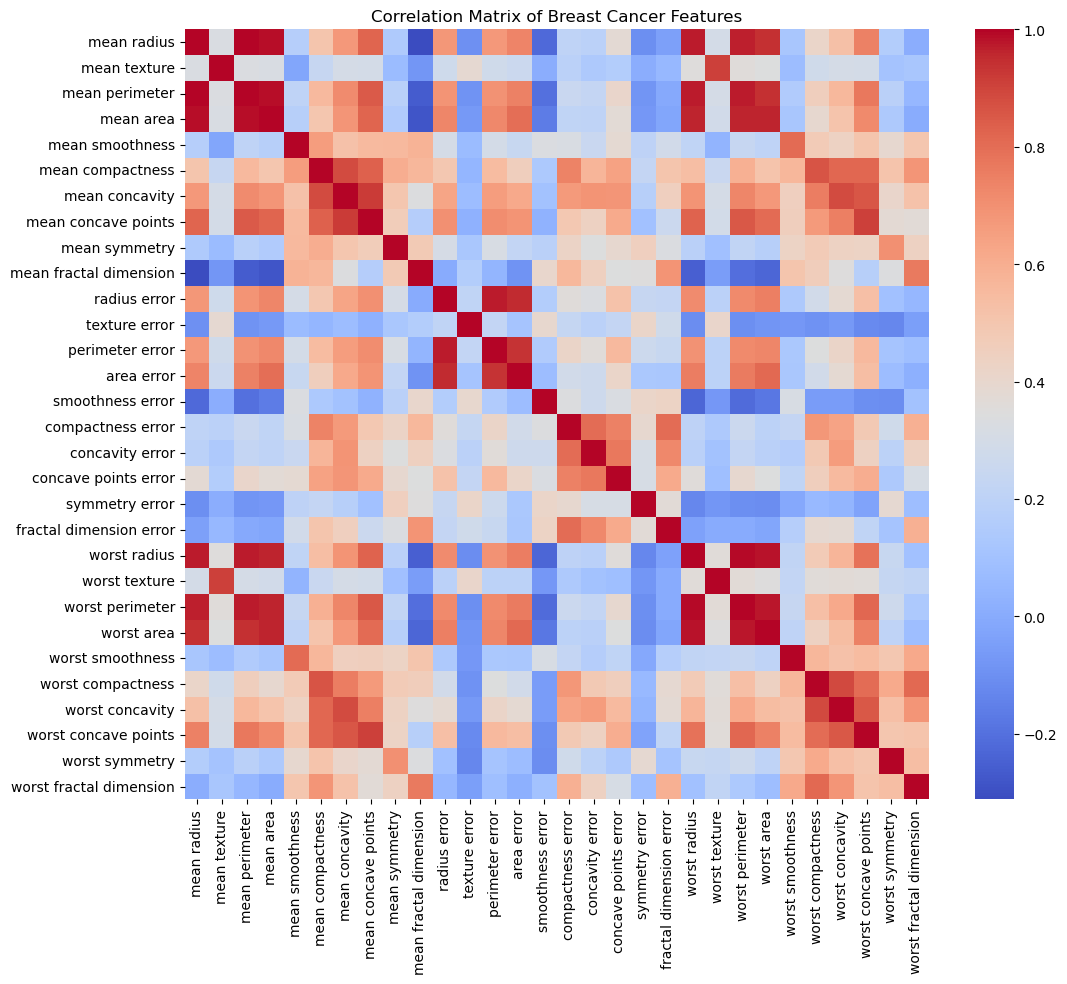

In [3]:
# Distribution of target variable from df_results
sns.countplot(x='target', data=df_results)
plt.title('Distribution of Benign (0) and Malignant (1) Tumors')
plt.show()

# Correlation heatmap from df_train
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Breast Cancer Features")
plt.show()

Dimensionality Reduction for Visualization
Dimensionality reduction can offer a visual understanding of the data in a reduced space. We'll use PCA and t-SNE for this purpose.

# Dimensionality Reduction

Dimensionality reduction is a crucial step in unsupervised learning, especially when dealing with high-dimensional data like the Wisconsin Breast Cancer dataset. It helps to visualize the data in two or three dimensions and can also improve the performance of clustering algorithms by reducing noise and computation.

## PCA (Principal Component Analysis)
We start with PCA, which is a linear dimensionality reduction technique. PCA identifies the directions (principal components) that maximize the variance in the data. Here, we reduce the data to two principal components and add these as new features (`pca-one` and `pca-two`) to our DataFrame.

## t-SNE (t-Distributed Stochastic Neighbor Embedding)
t-SNE, on the other hand, is a non-linear technique that is particularly well-suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. We use t-SNE to create two components (`tsne-one` and `tsne-two`) that we also add to our DataFrame.

## Visualization of Dimensionality Reduction Results
After applying PCA and t-SNE, we visualize the results. These visualizations show us the data points in a two-dimensional space where similar samples are positioned closer together. We use different colors to represent the different classes (benign and malignant) as given by the `target` variable in `df_results`. This can give us an intuition about how well the classes are separable in reduced dimensions and can guide our selection of clustering algorithms.


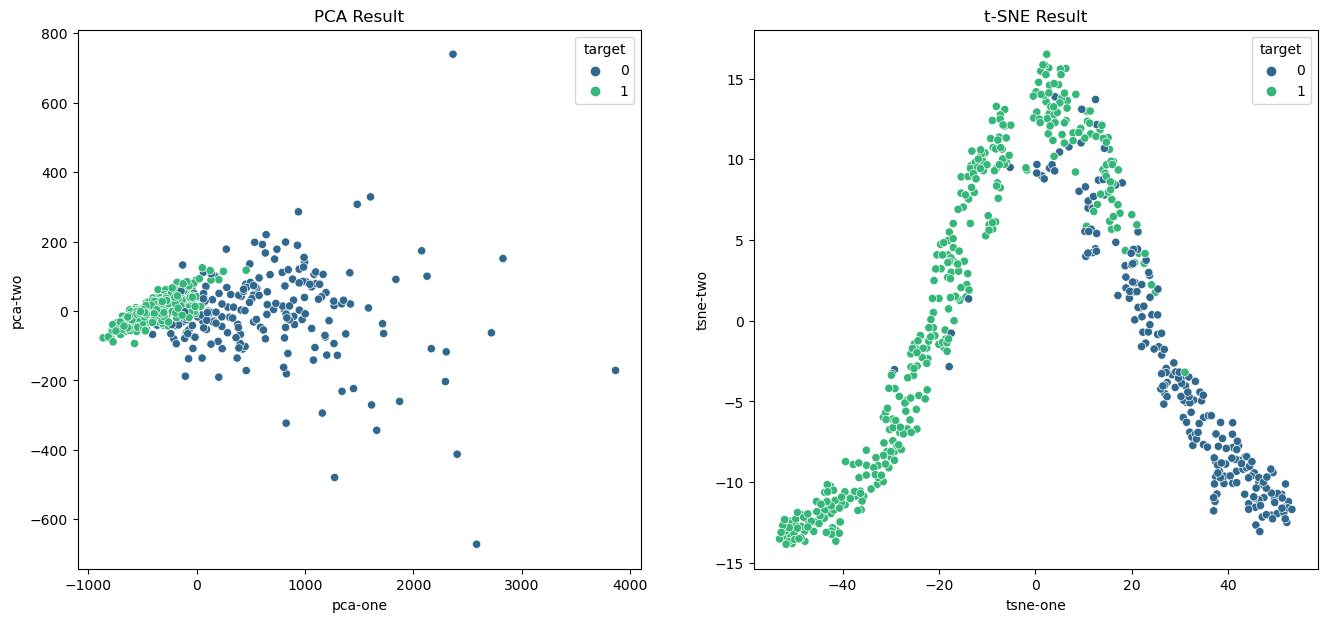

In [4]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_train)
df_train['pca-one'] = pca_result[:,0]
df_train['pca-two'] = pca_result[:,1] 

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_train)
df_train['tsne-one'] = tsne_results[:,0]
df_train['tsne-two'] = tsne_results[:,1]

# Visualization of PCA and t-SNE results
plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pca-one", y="pca-two", hue=df_results['target'], data=df_train, legend="full", palette="viridis")
plt.title('PCA Result')

plt.subplot(1, 2, 2)
sns.scatterplot(x="tsne-one", y="tsne-two", hue=df_results['target'], data=df_train, legend="full", palette="viridis")
plt.title('t-SNE Result')
plt.show()


# Standardizing the Data

Before we proceed with clustering, it's important to standardize the data. Standardization involves rescaling the features so that they have a mean of zero and a standard deviation of one. This process is vital because clustering algorithms like k-means and dimensionality reduction techniques like PCA are affected by the scale of the data.

## The StandardScaler
We use `StandardScaler` from Scikit-learn's preprocessing module, which standardizes features by removing the mean and scaling to unit variance. This z-score normalization ensures that each feature contributes equally to the distance calculations, thus preventing features with larger ranges from dominating the distance metric.

## Creating a New DataFrame
After standardization, we create a new DataFrame, `df_train_scaled`, which contains the scaled values. This DataFrame will be used in subsequent modeling steps to ensure that our clustering algorithms perform optimally.
s.

In [5]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_train)

# Creating a new DataFrame for the scaled data
df_train_scaled = pd.DataFrame(scaled_data, columns=df_train.columns)


# K-Means Clustering

K-Means is a popular clustering algorithm that partitions the data into K distinct, non-overlapping subsets (clusters). It assigns each data point to the cluster whose centroid (the mean of the points in the cluster) is nearest. The result is a set of clusters that minimize the intra-cluster variance (also known as the within-cluster sum of squares).

## Parameters and Fitting
We configure our K-Means algorithm with the following parameters:
- `n_clusters=2`: We set the number of clusters to 2, which corresponds to the two categories of tumors in our dataset (benign and malignant).
- `random_state=42`: This ensures that our results are reproducible.
- `n_init=30`: The algorithm will run with 30 different centroid seeds and the final results will be the best output of those runs in terms of inertia.

After initializing the K-Means algorithm with these parameters, we fit it to the standardized data `df_train_scaled`. The fitting process involves finding the best centroids for the two clusters we have specified.

## Storing Results
The cluster labels found by the K-Means algorithm for each data point are stored in the `df_results` DataFrame under a new column named `kmeans_cluster`. These labels indicate the cluster to which each sample has been assigned, which we will use for evaluating the performance of the clustering.


In [6]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=30)
kmeans.fit(df_train_scaled)
df_results['kmeans_cluster'] = kmeans.labels_

# Spectral Clustering

Spectral Clustering is an algorithm that uses the eigenvalues of a similarity matrix to reduce dimensionality before clustering in fewer dimensions. It works well for non-convex clusters and is especially good when the structure of the individual clusters is highly connected. 

## Algorithm Application
We apply the `SpectralClustering` algorithm from Scikit-learn's cluster module with the following key parameters:
- `n_clusters=2`: The number of clusters to form, which corresponds to the number of tumor categories (benign and malignant).
- `affinity='nearest_neighbors'`: This determines how the edge weights in the graph are constructed. Using nearest neighbors will base the affinity on the nearest neighbors of each point.
- `random_state=42`: To ensure reproducibility of our results.

The `fit_predict` method executes the algorithm on our scaled data `df_train_scaled` and assigns each sample to a cluster.

## Performance Evaluation
To evaluate the performance of Spectral Clustering, we use the Adjusted Rand Score (ARS). The ARS is a measure of the similarity between two data clusterings. A score close to 1 indicates perfect agreement between the true labels and the labels produced by the clustering algorithm, while a score close to 0 or negative indicates random or independent label assignments.

After calculating the ARS, we print the score to assess the effectiveness of Spectral Clustering in grouping the breast cancer data into benign and malignant categories.

## Storing Cluster Labels
Finally, we add the cluster labels produced by Spectral Clustering to our `df_results` DataFrame. These labels will be helpful for further analysis and comparison with the results of other clustering algorithms.
ly.

In [7]:

# Applying Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(df_train_scaled)

# Evaluate using Adjusted Rand Score
ars_spectral = adjusted_rand_score(df_results['target'], spectral_labels)
print(f"Adjusted Rand Score - Spectral Clustering: {ars_spectral}")

# Add Spectral Clustering labels to DataFrame
df_results['spectral_cluster'] = spectral_labels


Adjusted Rand Score - Spectral Clustering: 0.798361233599978


# Gaussian Mixture Model (GMM)

The Gaussian Mixture Model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. GMMs are especially useful for clustering when the clusters are assumed to be Gaussian distributed, allowing the model to account for the variance within each cluster.

## Applying the GMM
We utilize the `GaussianMixture` class from Scikit-learn's mixture module with the following parameters:
- `n_components=2`: This specifies the number of mixture components, or clusters, in the data.
- `random_state=42`: To ensure that the results are reproducible.

The `fit_predict` method is called on our scaled dataset `df_train_scaled` which fits the mixture model to the data and then predicts the labels for the data points.

## Evaluation with Adjusted Rand Score
To evaluate the clustering performance of our GMM, we use the Adjusted Rand Score (ARS). This metric measures the similarity between two assignments, ignoring permutations and with a chance normalization:

- An ARS of 1 indicates that the clusterings are identical (up to a permutation).
- An ARS of 0 indicates random labeling, independent of the true labels.

We calculate and print the ARS for the labels obtained from GMM against the original `target` labels from `df_results`.

## Recording Cluster Labels
The labels from the GMM clustering are added to the `df_results` DataFrame under a new column `gmm_cluster`. This addition facilitates a comprehensive comparison of the clustering outputs against the true labels and among different clustering algorithms.


In [8]:
# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df_train_scaled)

# Evaluate using Adjusted Rand Score
ars_gmm = adjusted_rand_score(df_results['target'], gmm_labels)
print(f"Adjusted Rand Score - GMM: {ars_gmm}")

# Add GMM cluster labels to DataFrame
df_results['gmm_cluster'] = gmm_labels


Adjusted Rand Score - GMM: 0.7618626036456432


# Model Evaluation using Adjusted Rand Score (ARS)

After applying various clustering algorithms, it is important to evaluate and compare their performance. The Adjusted Rand Score (ARS) is a function that measures the similarity between two data clusterings. It has a value that ranges from -1 to 1, where 1 means the clusterings are identical, and values close to 0 or negative values indicate random or independent cluster assignments.

## Define a Function for ARS Calculation
We define a function `calculate_ars` that takes the true labels and the cluster labels as inputs and returns the ARS. This function wraps the `adjusted_rand_score` method from Scikit-learn, providing a convenient way to calculate the ARS across multiple clustering outputs.

## Calculate ARS for Each Clustering Method
Using the `calculate_ars` function, we compute the ARS for the following clustering methods applied to our data:
- K-Means Clustering
- Spectral Clustering
- Gaussian Mixture Model (GMM)

## Results
The ARS results for each method are printed, allowing us to assess which clustering method aligns best with the true labels. Higher ARS values indicate better performance in terms of clustering accuracy and the preservation of the data's inherent groupings.

The output scores indicate the following:
- K-Means has an ARS of approximately 0.724.
- Spectral Clustering achieves an ARS of approximately 0.798.
- Gaussian Mixture Model has an ARS of approximately 0.762.

These scores suggest that Spectral Clustering has the highest alignment with the true labels, followed closely by the Gaussian Mixture Model and K-Means.


In [9]:
# Function to calculate Adjusted Rand Score
def calculate_ars(true_labels, cluster_labels):
    return adjusted_rand_score(true_labels, cluster_labels)

# Calculate Adjusted Rand Score for each clustering method
ars_kmeans = calculate_ars(df_results['target'], df_results['kmeans_cluster'])
ars_spectral = calculate_ars(df_results['target'], df_results['spectral_cluster'])
ars_gmm = calculate_ars(df_results['target'], df_results['gmm_cluster'])

# Print the Adjusted Rand Scores
print(f"Adjusted Rand Score - KMeans: {ars_kmeans}")
print(f"Adjusted Rand Score - Spectral Clustering: {ars_spectral}")
print(f"Adjusted Rand Score - Gaussian Mixture: {ars_gmm}")


Adjusted Rand Score - KMeans: 0.7238153129330208
Adjusted Rand Score - Spectral Clustering: 0.798361233599978
Adjusted Rand Score - Gaussian Mixture: 0.7618626036456432


# Ensembling Clustering Models

Ensembling methods combine multiple machine learning models to improve the overall performance, stability, and robustness of the predictive power. In clustering, ensembling can help to reconcile the results of different clustering algorithms to achieve a consensus clustering that may be more representative of the underlying structure in the data.

## Defining an Ensemble Function
We define an `ensemble_clusters` function that:
- Takes a row of cluster labels from multiple algorithms.
- Uses a `Counter` to count the occurrence of each cluster label for the row.
- Returns the most common cluster label as the ensemble result for that data point.

## Applying the Ensemble Function
We apply this function to each row in `df_results` using the `apply` method with `axis=1`, which ensures the function is applied row-wise.

## Storing the Ensemble Results
The ensemble cluster labels are stored in a new column `ensemble_cluster` in the `df_results` DataFrame. This column now represents a unified view of the clustering tendency as seen by K-Means, Spectral Clustering, and the Gaussian Mixture Model.

By ensembling, we aim to harness the strengths and mitigate the weaknesses of individual clustering approaches, potentially leading to a more accurate and stable partitioning of the data.
mble

In [10]:
from collections import Counter

def ensemble_clusters(row):
    clusters = [row['kmeans_cluster'], row['spectral_cluster'], row['gmm_cluster']]
    most_common = Counter(clusters).most_common(1)
    return most_common[0][0]  # Get the most common cluster label

# Apply the function to each row in df_results
df_results['ensemble_cluster'] = df_results.apply(ensemble_clusters, axis=1)


# Evaluation of Ensemble Method

After combining the clustering labels from our individual models into a single ensemble cluster label for each sample, it's crucial to assess how well this ensemble clustering has performed.

## Adjusted Rand Score for Ensemble
We calculate the Adjusted Rand Score (ARS) for our ensemble clustering results to evaluate its agreement with the true labels. ARS is particularly useful for measuring the quality of an ensemble method since it accounts for the chance grouping of data points into random clusters.

- An ARS close to 1 indicates a high degree of similarity between the ensemble clusters and the true labels, suggesting a successful ensemble strategy.
- An ARS close to 0 or negative would suggest that the ensemble clusters are no better than random chance.

## Output
We print the ARS for the ensemble to directly compare its performance against the individual clustering models we've previously evaluated. This score will tell us if our ensemble approach has managed to capture the consensus across different clustering methods and improve upon the individual results.


In [11]:
# Calculate Adjusted Rand Score for the ensemble
ars_ensemble = calculate_ars(df_results['target'], df_results['ensemble_cluster'])

# Print the Adjusted Rand Score for the ensemble
print(f"Adjusted Rand Score - Ensemble: {ars_ensemble}")


Adjusted Rand Score - Ensemble: 0.7991980419223775


# Comparison of Clustering Model Performance

The table below summarizes the performance of each clustering model according to precision, recall, F1-score, and Adjusted Rand Score:

| Method               | Precision | Recall  | F1-Score | Adjusted Rand Score |
|----------------------|-----------|---------|----------|---------------------|
| KMeans               | 0.906977  | 0.983193| 0.943548 | 0.723815            |
| Spectral Clustering  | 0.926893  | 0.994398| 0.959459 | 0.798361            |
| Gaussian Mixture     | 0.965217  | 0.932773| 0.948718 | 0.761863            |
| Ensemble             | 0.965812  | 0.949580| 0.957627 | 0.799198            |

## Analysis
- **Ensemble Method**: The ensemble approach has the highest Adjusted Rand Score, indicating that it is the most effective in mirroring the true label distribution. This method also shows strong performance across precision, recall, and F1-score.
- **Spectral Clustering**: It stands out with the highest recall and a very competitive Adjusted Rand Score, suggesting it is particularly effective at identifying most of the true positives.
- **Gaussian Mixture**: This model has the highest precision, indicating a strong ability to identify true positives while minimizing false positives.
- **KMeans**: While KMeans has the lowest scores in all categories, it still performs well, highlighting the utility of even simple models on this dataset.

## Conclusion
The results demonstrate the effectiveness of ensemble methods in clustering, combining the strengths of individual models to achieve superior overall performance. The choice between models may also be influenced by the specific requirements of precision or recall, depending on the application domain and the cost of false positives or false negatives.


In [12]:
def map_clusters_to_labels(cluster_labels, true_labels):
    label_map = {}
    for cluster in set(cluster_labels):
        # Find the index of points in each cluster
        indices = [i for i, x in enumerate(cluster_labels) if x == cluster]
        # Subset the true labels based on these indices
        labels_in_cluster = true_labels.iloc[indices]
        # Find the most common label in these points
        label_map[cluster] = labels_in_cluster.value_counts().idxmax()
    return [label_map[label] for label in cluster_labels]

# Map the predicted cluster labels to actual target labels
mapped_kmeans_labels = map_clusters_to_labels(df_results['kmeans_cluster'], df_results['target'])
mapped_spectral_labels = map_clusters_to_labels(df_results['spectral_cluster'], df_results['target'])
mapped_gmm_labels = map_clusters_to_labels(df_results['gmm_cluster'], df_results['target'])
mapped_ensemble_labels = map_clusters_to_labels(df_results['ensemble_cluster'], df_results['target'])

# Calculate precision, recall, F1 score, and Adjusted Rand Score for each model
def calculate_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    ars = adjusted_rand_score(true_labels, predicted_labels)
    return precision, recall, f1, ars

# Calculate metrics for each model including Adjusted Rand Score
metrics_kmeans = calculate_metrics(df_results['target'], mapped_kmeans_labels)
metrics_spectral = calculate_metrics(df_results['target'], mapped_spectral_labels)
metrics_gmm = calculate_metrics(df_results['target'], mapped_gmm_labels)
metrics_ensemble = calculate_metrics(df_results['target'], mapped_ensemble_labels)

# Creating a dictionary to store results for easier visualization
results = {
    "KMeans": metrics_kmeans,
    "Spectral Clustering": metrics_spectral,
    "Gaussian Mixture": metrics_gmm,
    "Ensemble": metrics_ensemble
}

# Convert the dictionary to a DataFrame for better visualization
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Precision', 'Recall', 'F1-Score', 'Adjusted Rand Score'])

# Display the DataFrame
results_df


Precision    Recall  F1-Score  Adjusted Rand Score
KMeans                0.906977  0.983193  0.943548             0.723815
Spectral Clustering   0.926893  0.994398  0.959459             0.798361
Gaussian Mixture      0.965217  0.932773  0.948718             0.761863
Ensemble              0.965812  0.949580  0.957627             0.799198

# Visualization of Clustering Correctness

Visual analysis of clustering results can provide intuitive insights into the performance of different algorithms. By plotting the PCA-reduced data and marking the correct and incorrect predictions, we can visually assess where each clustering method succeeds and where it might be making errors.

## Function for Correctness
We define a function `correct_predictions` that compares the mapped labels (from clustering to actual labels) with the true labels. It returns a boolean array with `True` for correct predictions and `False` for incorrect ones.

## Visualization Strategy
We set up a large matplotlib figure to accommodate subplots for each clustering method. For each subplot, we use the following approach:
- The x and y axes represent the first two principal components from PCA, giving us a 2D projection of the high-dimensional data.
- Points are marked with different markers to indicate the correctness of the prediction: 'o' for correct and 'X' for incorrect.
- The color hue represents the cluster label assigned by each method.

## Subplots for Each Method
We create four subplots, one for each clustering method:
- **PCA - KMeans Clustering**: Visualizes the KMeans results.
- **PCA - Spectral Clustering**: Shows the results from Spectral Clustering.
- **PCA - Gaussian Mixture Model**: Depicts the clusters found by the Gaussian Mixture Model.
- **PCA - Ensemble Method**: Illustrates the ensemble approach's clustering.

Each subplot provides a direct visual comparison between correct and incorrect classifications, highlighting the areas where each clustering method performs well and where it may confuse between the classes.

## Displaying the Plots
The plots are displayed in a 2x2 grid, with each cell of the grid depicting the result of a different clustering algorithm. This visualization makes it easier to compare the performance of the algorithms side by side.


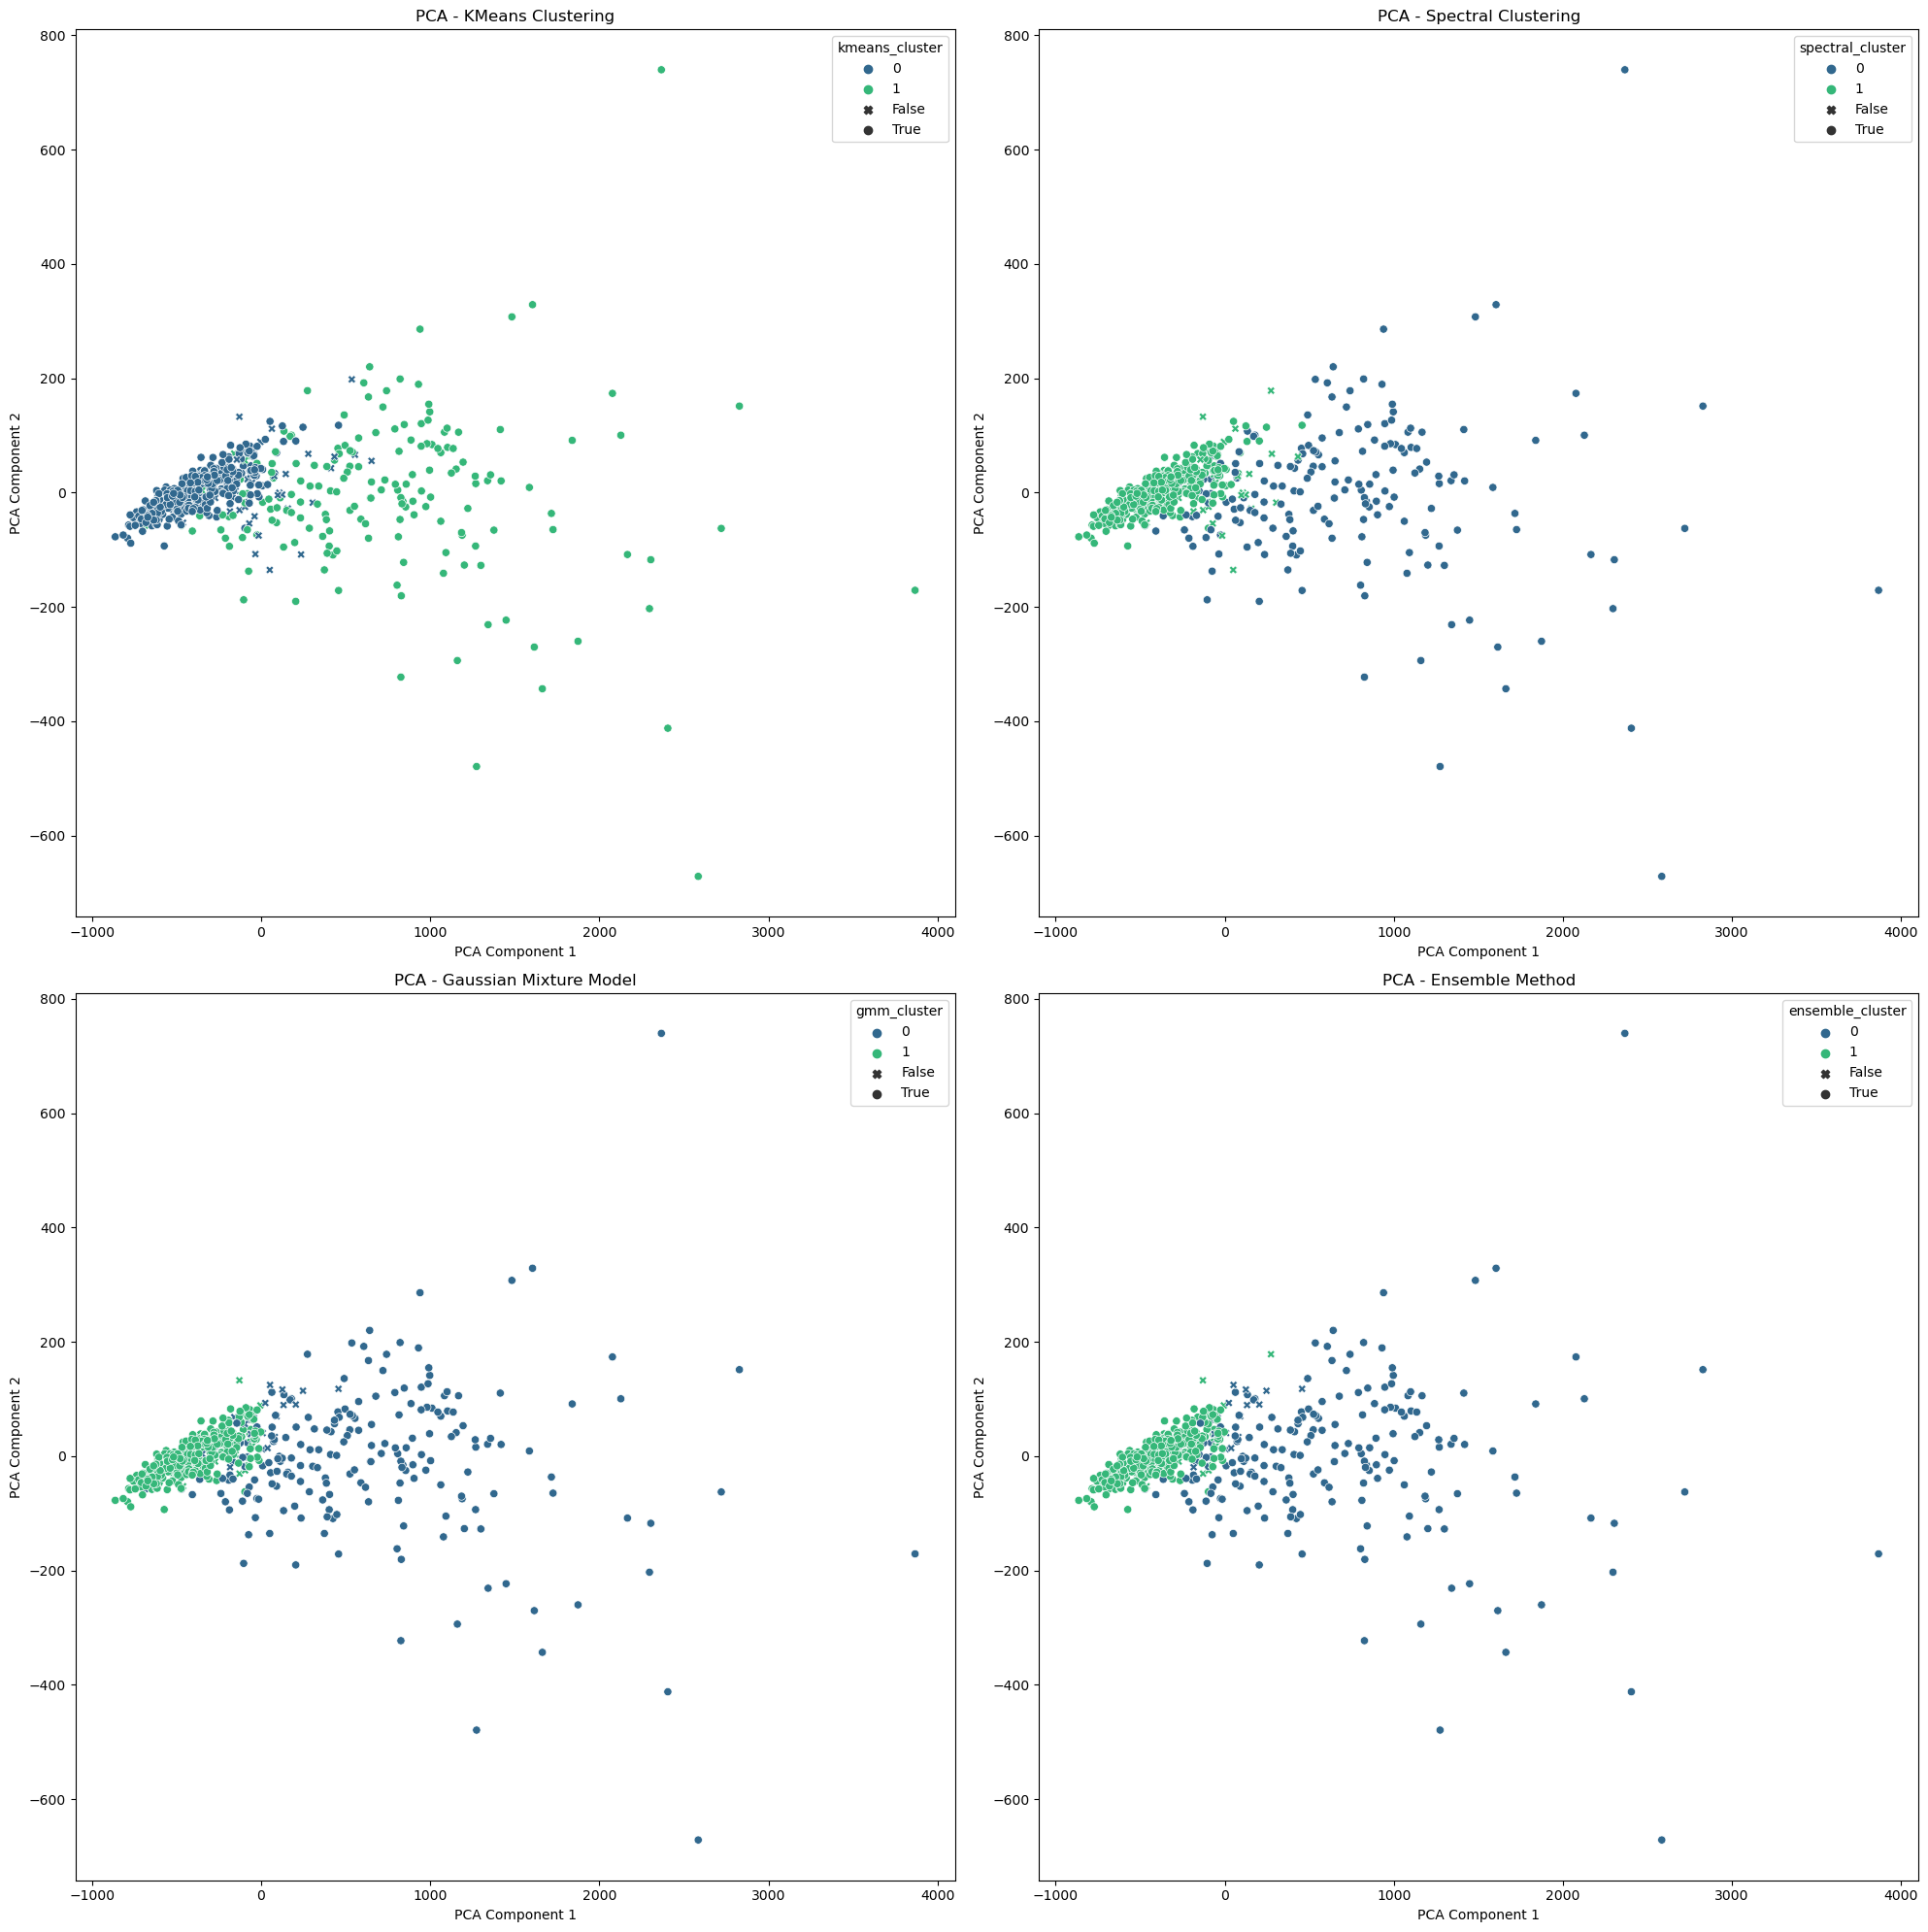

In [13]:
# Function to determine if predictions are correct
def correct_predictions(mapped_labels, true_labels):
    return np.array(mapped_labels) == np.array(true_labels)

# Determine correct and incorrect predictions for each method
correct_kmeans = correct_predictions(mapped_kmeans_labels, df_results['target'])
correct_spectral = correct_predictions(mapped_spectral_labels, df_results['target'])
correct_gmm = correct_predictions(mapped_gmm_labels, df_results['target'])
correct_ensemble = correct_predictions(mapped_ensemble_labels, df_results['target'])

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Define a function to plot with different markers
def plot_with_markers(ax, pca_data, correct_predictions, cluster_labels, title):
    # Points with correct predictions
    sns.scatterplot(x='pca-one', y='pca-two', style=correct_predictions, markers={True: 'o', False: 'X'}, 
                    hue=cluster_labels, data=pca_data, palette="viridis", ax=ax)
    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

# Create subplots for each clustering method
ax1 = plt.subplot(2, 2, 1)
plot_with_markers(ax1, df_train, correct_kmeans, df_results['kmeans_cluster'], 'PCA - KMeans Clustering')

ax2 = plt.subplot(2, 2, 2)
plot_with_markers(ax2, df_train, correct_spectral, df_results['spectral_cluster'], 'PCA - Spectral Clustering')

ax3 = plt.subplot(2, 2, 3)
plot_with_markers(ax3, df_train, correct_gmm, df_results['gmm_cluster'], 'PCA - Gaussian Mixture Model')

ax4 = plt.subplot(2, 2, 4)
plot_with_markers(ax4, df_train, correct_ensemble, df_results['ensemble_cluster'], 'PCA - Ensemble Method')

# Show the plots
plt.tight_layout()
plt.show()


# Conclusion

In this study, we applied various unsupervised learning techniques to the Wisconsin Breast Cancer dataset with the goal of clustering the data into benign and malignant categories. The algorithms included K-Means, Spectral Clustering, Gaussian Mixture Models, and an Ensemble method that combined the predictions of the individual models. 

## Key Findings:
- **Spectral Clustering** yielded the highest recall, suggesting it was particularly effective at identifying the majority of malignant cases.
- **Gaussian Mixture Model** demonstrated the highest precision, which indicates its strength in confidently identifying true malignant cases with a low rate of false positives.
- The **Ensemble Method** showed a balanced performance with high scores across all metrics, including the highest Adjusted Rand Score. This suggests that it effectively combined the strengths of the individual models, resulting in a robust clustering performance.

## Implications:
- The choice of the clustering algorithm can be guided by the specific needs of the medical diagnosis process. For instance, if minimizing false negatives is crucial, Spectral Clustering might be preferred. On the other hand, for minimizing false positives, the Gaussian Mixture Model may be more appropriate.
- The Ensemble Method's superior performance indicates that combining different clustering approaches can be a powerful strategy in contexts where no single model is clearly superior.

## Future Work:
- Further research could involve applying these clustering techniques to a larger and more diverse set of diagnostic imaging data to validate and potentially improve the generalizability of the models.
- Investigating the use of deep learning-based clustering algorithms might also yield interesting comparisons and possibly more nuanced cluster distinctions.

## Final Thoughts:
This project underscores the importance of preprocessing, the careful selection of unsupervised learning models, and the evaluation of their performance with appropriate metrics. It demonstrates that while individual models have their merits, an ensemble approach can harness the collective strengths of various models to achieve a more accurate clustering solution, which is paramount in critical fields such as medical diagnosis.

